<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/03May20_3_intro_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Correlations

### Introduction

In this lesson, we'll see how we can go further with reducing features by using correlations to identify features that capture similar information.  Let's get started.

### Loading our Data

Let's load up our Boston Housing Dataset.

In [0]:
from sklearn.datasets import load_boston
import pandas as pd

data = load_boston()
X_data = data['data']
X = pd.DataFrame(X_data, columns = data['feature_names'])
y = data['target']

Now let's just choose two of our features for our model - TAX and RAD.

In [0]:
X_feats = X[['TAX', 'RAD']]

In [0]:
X_feats[:3]

,TAX,RAD
0,296.0,1.0
1,242.0,2.0
2,242.0,2.0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_feats, y, random_state = 42)

model_two_feats = LinearRegression()
model_two_feats.fit(X_train, y_train).score(X_test, y_test)

0.2800674393285203

So we see that even with just these two features.  We get a score close to $.30$.

### Eliminating Features

While it may not be obvious at first, the two features above are pretty redundant.  We can get a sense of this if we plot the two features.

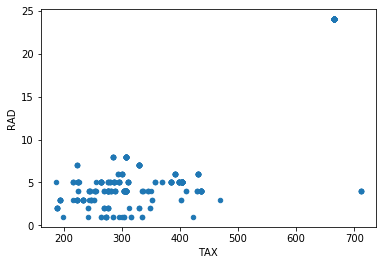

In [0]:
X.plot.scatter(x = 'TAX', y = 'RAD')

While subtle, what the plot above shows is that the relationship between TAX and RAD is linear.  In other words, if we know one of the observation's values, we can use a line to do a good job of predicting the the value of the other feature.  And we can capture this in the correlation metric.

In [0]:
import numpy as np
np.corrcoef(X['TAX'], X['RAD'])

array([[1.        , 0.91022819],
       [0.91022819, 1.        ]])

When our correlation metric is high, we can pretty safely remove one of the features, as we are essentially modeling the same information twice.

In [0]:
X_tax = X[['TAX']]

X_train, X_test, y_train, y_test = train_test_split(X_tax, y, random_state = 42)

model_one_feat = LinearRegression(fit_intercept = False)
model_one_feat.fit(X_train, y_train).score(X_test, y_test)

0.2508430039544137

Now while this often will not improve the scores of our model, it does make our model simpler.  And remember, this reduction in multicollinearity means that the effect will be more consolidated in one feature.

### Digging Deeper into the Correlation Coefficient

Remember that correlation coefficient tells us how well a line can describe the relationship between $x$ and $y$.

Let's take a look at some correlations below.  

<img src="https://github.com/jigsawlabs-student/feature-selection/blob/master/corr-nums.png?raw=1" width="60%">

So we can that our correlations range between 1 and -1.  And the more a line describes the relationship, the larger the absolute value of our correlation.  When a line does not do a good job of describing the correlation, like in the center, the correlation is 0.  

Now below we see datasets each that have perfect correlations, and so the correlation is either -1 or 1.

<img src="https://github.com/jigsawlabs-student/feature-selection/blob/master/corr-slope.png?raw=1" width="60%">

So notice, that the *slope* of the line **is not** captured by the correlation coefficient.  

### Capturing Nonlinear Relationships

Another thing to remember about correlation coefficients is that they only indicate whether the relationship between two variables is *linear*.  For example, take a look at the following variables.

<img src="https://github.com/jigsawlabs-student/feature-selection/blob/master/corr-zeros.png?raw=1" width="60%">

We can see that while with some of the these features, knowing one feature does tell us information about the value of the other feature, because the relationship is not *linear* the correlation coefficient is 0.

Now let's build a model with two different features, `NOX` and `DIS`.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_feats = X[['NOX', 'DIS']]
X_train, X_test, y_train, y_test = train_test_split(X_feats, y, random_state = 42)


model = LinearRegression()
model.fit(X_train, y_train).score(X_test, y_test)

0.21550826109907628

If we plot the two features, we see that while one feature does describe the other, the two are not as highly correlated as we might suspect.

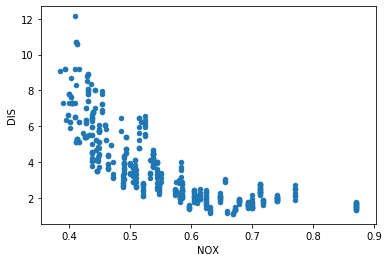

In [0]:
X_feats.plot.scatter(x = 'NOX', y = 'DIS')

In [0]:
np.corrcoef(X['NOX'], X['DIS'])

array([[ 1.        , -0.76923011],
       [-0.76923011,  1.        ]])

Again, this is because the relationship is not linear.  Well if we want to do better at capturing this non-linear relationship we can first extract the rank of each of the features.

In [0]:
X[['NOX', 'DIS']].rank()[:5]

,NOX,DIS
0,261.0,323.0
1,150.5,370.5
2,150.5,370.5
3,137.0,421.0
4,137.0,421.0


And plotting the ranks shows the relationship is now pretty linear.

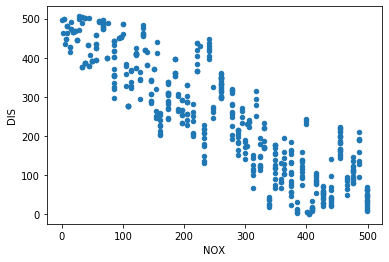

In [0]:
X[['NOX', 'DIS']].rank().plot.scatter(x = 'NOX', y = 'DIS')

And this is also captured by our ranked correlation.

In [0]:
np.corrcoef(X['NOX'].rank(), X['DIS'].rank())

array([[ 1.        , -0.88001486],
       [-0.88001486,  1.        ]])

Another word for this rank correlation is the *spearman* correlation, and we calculate it with pandas.

In [0]:
X[['NOX', 'DIS']].corr(method = 'spearman')

,NOX,DIS
NOX,1.000000,-0.880015
DIS,-0.880015,1.000000


If we do not provide the method argument, `corr` defaults to the pearson correlation, which is what we saw previously.

In [0]:
X[['NOX', 'DIS']].corr()

,NOX,DIS
NOX,1.00000,-0.76923
DIS,-0.76923,1.00000


### Summary

In this lesson, we learned about the pearson correlation coefficient and the spearman correlation coefficient.  The pearson correlation coefficient describes the *linear* relationship between two variables.  The number ranges between -1 and 1, and the larger the number the more a line can be used to capture the relationship between the variables.

Because the pearson coefficient only captures linear relationship, it can miss non-linear relationships.  The spearman correlation coefficient can capture both linear and non-linear relationships between variables.  It works by first finding the rank value of the observations, and then calculates the correlation of the ranks for the two features.

We care about correlations because they can help us identify redundant features.  Once identified we can then try removing one of the features.  This makes our model simpler and reduces multicollinearity.

### Resources

[Khan Academy correlation coefficient formula](https://www.youtube.com/watch?v=u4ugaNo6v1Q)